# Exploratory Analysis

Variables used in this dataset:

- Absolute Temperature (in K)
- Relative Luminosity (L/Lo)
- Relative Radius (R/Ro)
- Absolute Magnitude (Mv)
- Star Color (white, red, blue, yellow, yellow-orange, etc)
- Spectral Class (O,B,A,F,G,K,,M)
- Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)

Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('../data/prepared/data.pkl')

In [136]:
print(df.shape)
df.head()

(240, 7)


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,red,M
1,3042,0.000500,0.1542,16.60,0,red,M
2,2600,0.000300,0.1020,18.70,0,red,M
3,2800,0.000200,0.1600,16.65,0,red,M
4,1939,0.000138,0.1030,20.06,0,red,M


In [14]:
# inspect NULL values
df.isnull().values.any()

False

In [16]:
# class to predict
df['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

In [60]:
star_type_dict = {0: 'Brown Dwarf', 
                  1: 'Red Dwarf', 
                  2: 'White Dwarf', 
                  3: 'Main Sequence', 
                  4: 'Supergiant', 
                  5: 'Hypergiant'}

## Check for correlating columns

In [17]:
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


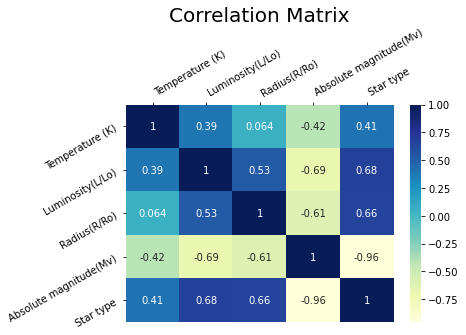

In [42]:
def plot_correlation(df):
    corr = df.corr()
    ax = plt.subplot()
    sns.heatmap(corr, annot=True, cmap="YlGnBu", ax=ax)
    ax.set_title('Correlation Matrix', fontsize=20)
    ax.xaxis.set_ticks_position('top') 
    ax.xaxis.set_ticklabels(corr.columns, rotation=30, horizontalalignment='left')
    ax.yaxis.set_ticklabels(corr.columns, rotation=30);
        
plot_correlation(df)

Only the absolute magnitude and the type of star are highly negatively correlated. 

The absolute magnitude measures the brightness of a star. It is a measure of the luminosity of a celestrial object on an inverse logarithmic astronomical magnitude scale. Therefore, the brighter an object, the smaller the numerical value of its absolute magnitude. 

Now we understand that the brighter the star, the smaller the absolute magnitude and the larger we expect the star to be.

Another variable to measure a form of brightness is luminosity — how much energy is emitted per second. From the above matrix we notice that there is a somewhat correlation between relative luminosity (relative to the sun) and absolute magnitude. The emitted amount of energy does not predict how bright the star overall is. A larger star appears brighter, but does not need to emit more light from its surface.

Given this, we would expect to observe a correlation between the radius of a star and its absolute magnitude. While we do find a negative relationship it is not very strong. 

## Star characteristics visualization

As the absolute magnitude nearly equals the type of a star, we do not find such a clear correlation between the absolute magnitude and the absolute temperature. 

While the below figure shows a negative relationship between the absolute magnitude and the size of the star, there is no such a relationship between the temperature and the size of the star. 

Total Counted Stars = 240
Yellow coloured point in the Main Sequence star band denotes our SUN


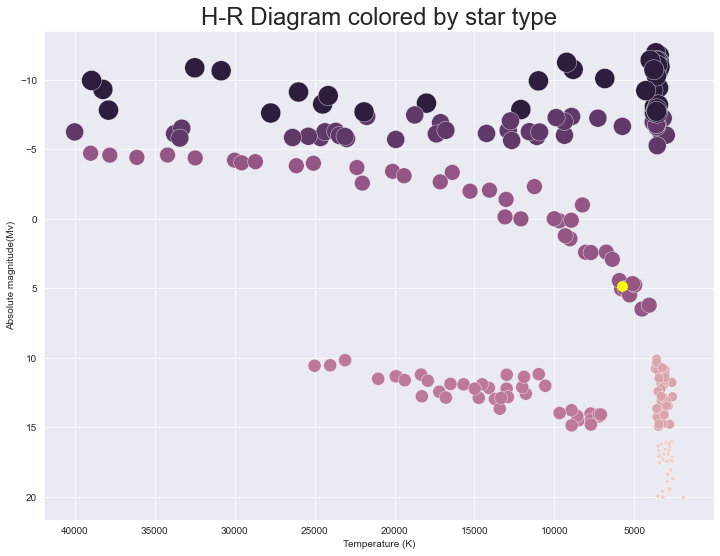

In [184]:
print("Total Counted Stars = {}".format(len(df))) 
print("Yellow coloured point in the Main Sequence star band denotes our SUN")

fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
g = sns.scatterplot(data=df, 
                    x="Temperature (K)", 
                    y="Absolute magnitude(Mv)", 
                    hue="Star type", 
                    size='Star type',
                    sizes=(20, 400),
                    legend=False)
# new_labels = ['Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant']
# plt.legend(title='Star type', loc='lower left', labels=new_labels)   
plt.scatter(5778,4.83, s=95, c='yellow', marker = 'o' )
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("H-R Diagram colored by star type", fontsize=24);

## Same graph visualized by the color of the star. 
The size of the dots represent the size of the star, and the marker represents the spectral class.

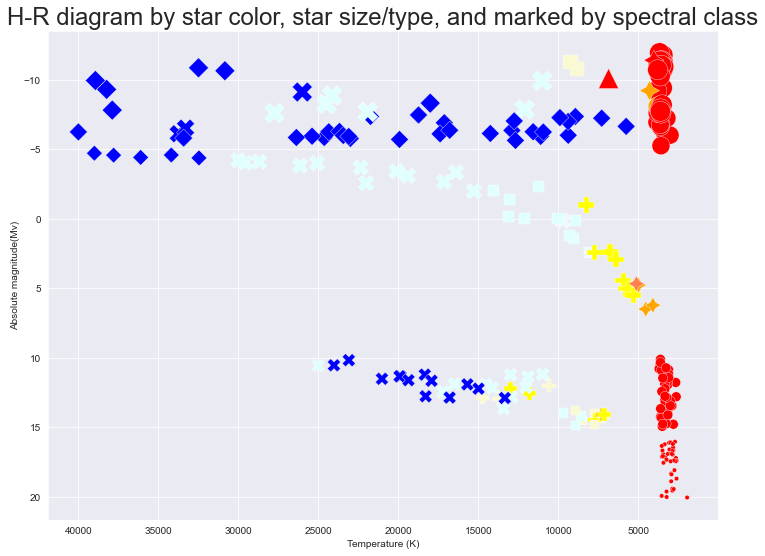

In [185]:
color_dict = {'red': 'red',
             'blue white': 'lightcyan',
             'white': 'lightgoldenrodyellow',
             'white yellow': 'yellow',
             'pale yellow orange': 'gold',
             'blue': 'blue',
             'whitish': 'aliceblue',
             'orange': 'orange',
             'orange red': 'coral'}

sns.set_style("darkgrid")

fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
g = sns.scatterplot(data=df, 
                    x="Temperature (K)", 
                    y="Absolute magnitude(Mv)", 
                    hue="Star color", 
                    size='Star type',
                    palette=color_dict,
                    style='Spectral Class',
                    sizes=(20, 400), 
                    legend=False)
# plt.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
# plt.legend([],[], frameon=False)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("H-R diagram by star color, star size/type, and marked by spectral class", fontsize=24);

From the above figure we can see that the color of the star, as we observe it, various by star type, but also overlaps for different types of stars. As the below figures show, we do see a slight relation between the observed color of the star and the spectral class of the star, the marker and the color tend to be similar per star.

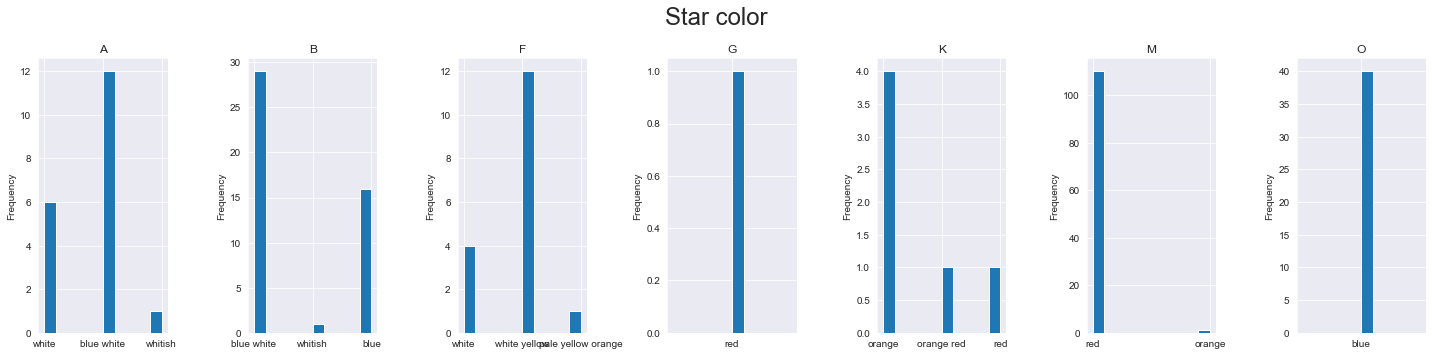

In [130]:
for i, (name, group) in enumerate(df.groupby('Spectral Class')):
#     star_name = star_type_dict[name]
    fig = plt.gcf()
    fig.set_size_inches(20,5)
    fig.suptitle('Star color', fontsize=24)
    ax = plt.subplot(1, 7, i+1)
    group['Star color'].hist()
    ax.set_title("{}".format(name))
    plt.ylabel("Frequency")
    plt.tight_layout();

## Relationship between temperature and luminosity

Total Counted Stars = 240
Yellow coloured point in the Main Sequence star band denotes our SUN


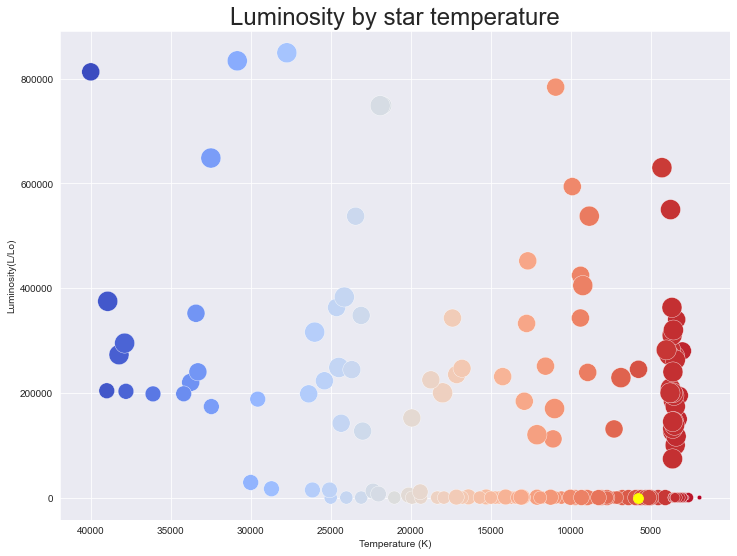

In [171]:

print("Total Counted Stars = {}".format(len(df))) 
print("Yellow coloured point in the Main Sequence star band denotes our SUN")

fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
g = sns.scatterplot(data=df, 
                    x="Temperature (K)", 
                    y="Luminosity(L/Lo)", 
                    hue="Temperature (K)", 
                    size='Star type',
                    sizes=(20, 400),
                    palette=sns.color_palette("coolwarm", as_cmap=True).reversed(),
                   legend=False)  
plt.scatter(5778,4.83, s=95, c='yellow', marker = 'o' )
plt.gca().invert_xaxis()
plt.title("Luminosity by star temperature", fontsize=24);

## Relationship between radius and magnitude

Total Counted Stars = 240


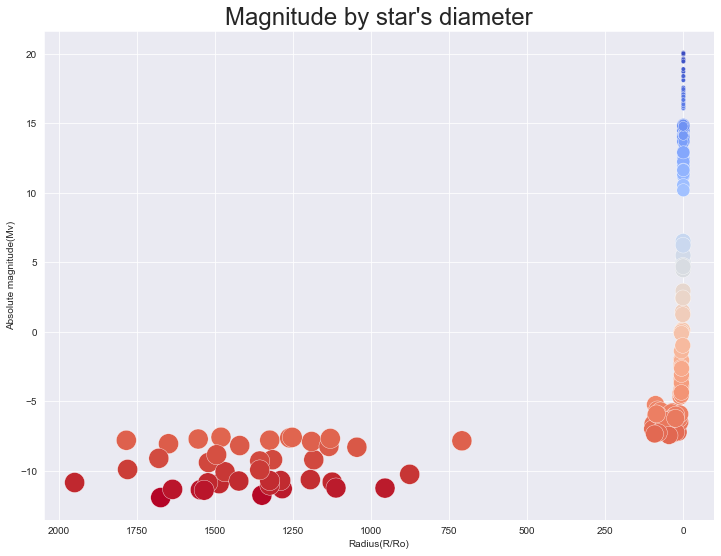

In [176]:
print("Total Counted Stars = {}".format(len(df))) 

fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
g = sns.scatterplot(data=df, 
                    x="Radius(R/Ro)", 
                    y="Absolute magnitude(Mv)", 
                    hue="Absolute magnitude(Mv)", 
                    size='Star type',
                    sizes=(20, 400),
                    palette=sns.color_palette("coolwarm", as_cmap=True).reversed(),
                   legend=False)  
plt.gca().invert_xaxis()
plt.title("Magnitude by star's diameter", fontsize=24);

## Frequency distributions per star type
The below figures show frequency distributions of the values per variable in relation to the star type.

In [65]:
def frequency_plots(df, star_type_dict, variable=str):
    for i, (name, group) in enumerate(df.groupby('Star type')):
        star_name = star_type_dict[name]
        fig = plt.gcf()
        fig.set_size_inches(20,5)
        fig.suptitle(variable, fontsize=24)
        ax = plt.subplot(1, 7, i+1)
        group[variable].hist()
        ax.set_title("{}".format(star_name))
        plt.ylabel("Frequency")
        plt.tight_layout();

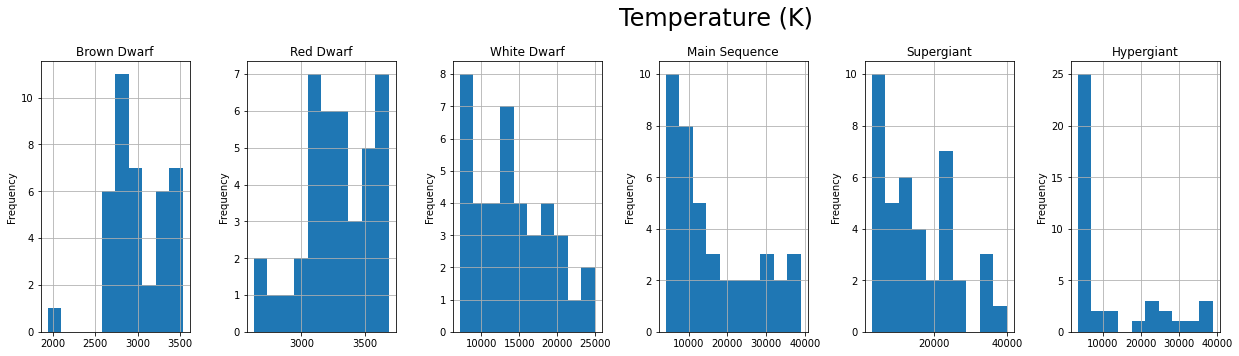

In [67]:
frequency_plots(df, star_type_dict, variable='Temperature (K)')

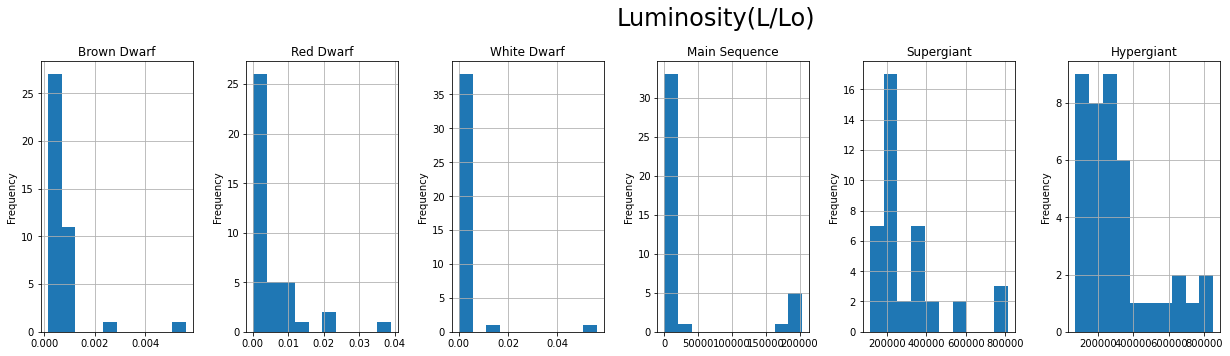

In [68]:
frequency_plots(df, star_type_dict, variable='Luminosity(L/Lo)')

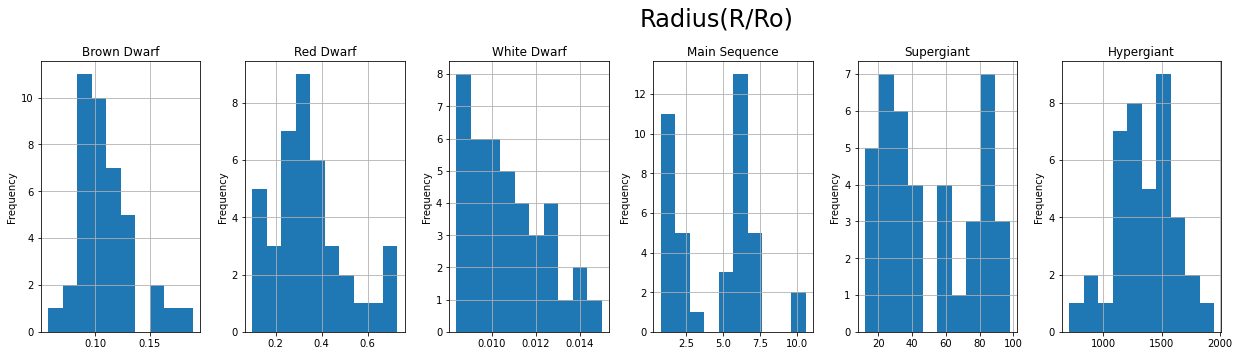

In [69]:
frequency_plots(df, star_type_dict, variable='Radius(R/Ro)')

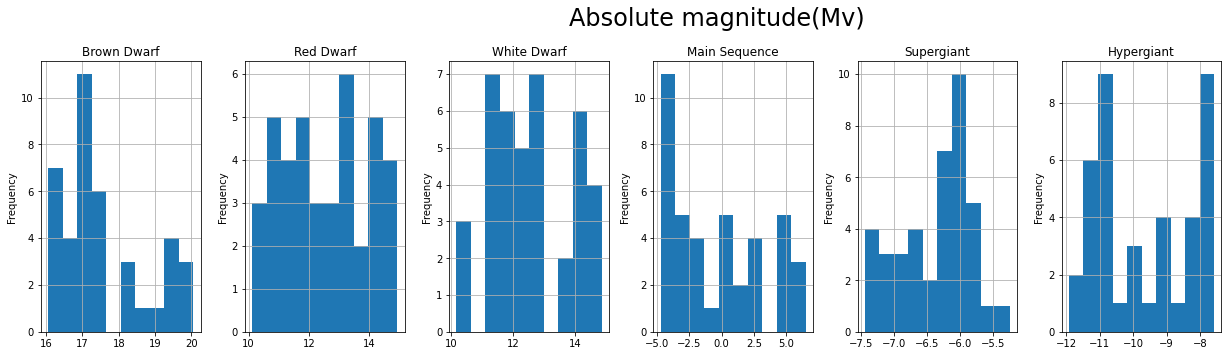

In [70]:
frequency_plots(df, star_type_dict, variable='Absolute magnitude(Mv)')

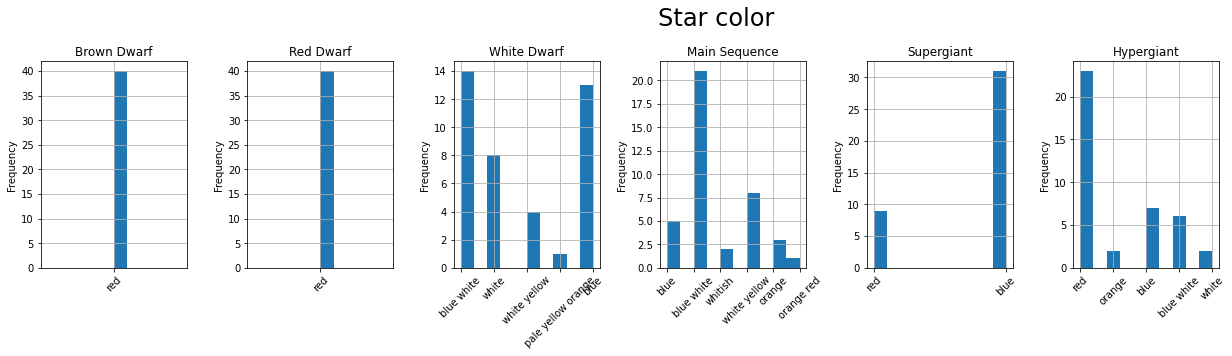

In [72]:
for i, (name, group) in enumerate(df.groupby('Star type')):
        star_name = star_type_dict[name]
        fig = plt.gcf()
        fig.set_size_inches(20,5)
        fig.suptitle('Star color', fontsize=24)
        ax = plt.subplot(1, 7, i+1)
        group['Star color'].hist()
        ax.set_title("{}".format(star_name))
        plt.ylabel("Frequency")
        plt.xticks(rotation=45) # rotate x-labels
        plt.tight_layout();

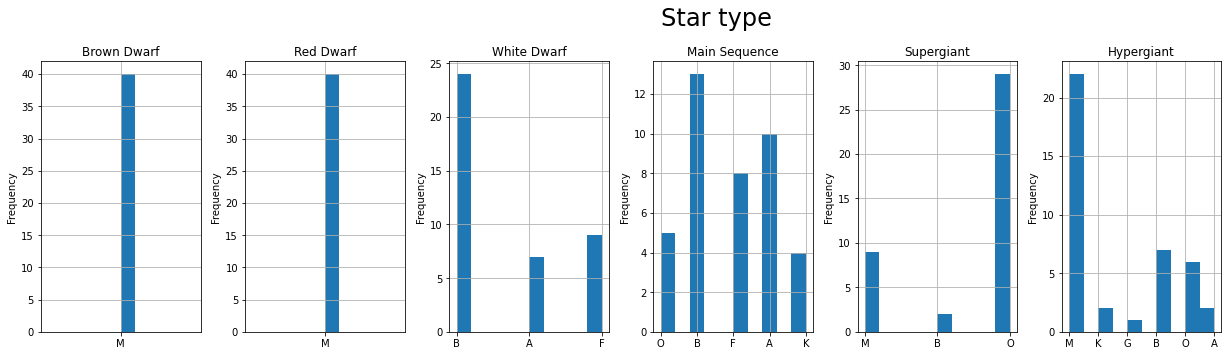

In [71]:
for i, (name, group) in enumerate(df.groupby('Star type')):
        star_name = star_type_dict[name]
        fig = plt.gcf()
        fig.set_size_inches(20,5)
        fig.suptitle('Star type', fontsize=24)
        ax = plt.subplot(1, 7, i+1)
        group['Spectral Class'].hist()
        ax.set_title("{}".format(star_name))
        plt.ylabel("Frequency")
        plt.tight_layout();